# Foundations of Statistical Analysis and Machine Learning - Final exam exercise 2

### Guidelines

The exam is composed of two exercises (on separate notebooks) each one with a specific dataset. In total, there are three independent parts to complete:
* Exercise 1 (8 points): regression
* Exercise 2 part 1 (9 points): classification
* Exercise 2 part 2 (3 points): clustering

You can work directly on the notebooks. At the end of the 2-hour exam, you will have 5 minutes to upload it on Teams.

Don't forget that you have to complete the TWO notebooks to have the maximum grade.

Many questions can be tackled even if the previous ones are not completed or not correct.

The subject is long but don't worry if you cannot complete 100 % of the questions, try to do as much as you can. In case you are blocked at some point, don't panic. Just move on to the next question.

Avoid "naive" copy-pasting: you will not understand what you are doing and it will be a problem for the next questions. Notebooks that are cluttered with useless code that has been mindlessly copied from previous examples will be penalized. Moreover, similarities between student works are easy to spot.

Good luck!

## Exercise 2

Here are some libraries that could be usefull in the exercises.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn 

We will work on the provided data set BankChurners that gathers information on the customers of a bank.

In [3]:
# Loading the original data set
data = pd.read_csv("BankChurners.csv")
data.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


In [4]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

Here is some code to execute to prepare the data set.

In [5]:
# Removing the last two columns that are useless
data = data.iloc[:,:-2]

# Encoding the customer churn
data.Attrition_Flag = data.Attrition_Flag.replace({'Attrited Customer':1,'Existing Customer':0})

# Encoding the gender
data.Gender = data.Gender.replace({'F':1,'M':0})

# Dropping rows with unknown values
data = data.drop(data[data.Education_Level=='Unknown'].index, axis=0)
data = data.drop(data[data.Income_Category=='Unknown'].index, axis=0)

# Encoding the education level with an (ordered) scale
data.Education_Level = data.Education_Level.replace({'Uneducated':0,'High School':1,'College':2,'Graduate':3,'Post-Graduate':4,'Doctorate':5})

# Encoding the income category with the mean value of each income interval
data.Income_Category = data.Income_Category.replace({'Less than $40K':20,'$40K - $60K':50,'$60K - $80K':70,'$80K - $120K':100,'$120K +':150})

# Encoding the marital status
data = pd.concat([data,pd.get_dummies(data['Marital_Status']).drop(columns=['Unknown'])],axis=1)

# Encoding the card category
data = pd.concat([data,pd.get_dummies(data['Card_Category'], prefix='Card')], axis=1)
# data = pd.concat([data,pd.get_dummies(data['Card_Category']).drop(columns=['Platinum'])],axis=1)
# data.drop(columns = ['Education_Level','Income_Category','Marital_Status','Card_Category','CLIENTNUM'],inplace=True)

# Removing the useless columns
data = data.drop(columns = ['Marital_Status','Card_Category','CLIENTNUM'])

data.head(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Divorced,Married,Single,Card_Blue,Card_Gold,Card_Platinum,Card_Silver
0,0,45,0,3,1,70,39,5,1,3,...,42,1.625,0.061,0,1,0,1,0,0,0
1,0,49,1,5,3,20,44,6,1,2,...,33,3.714,0.105,0,0,1,1,0,0,0
2,0,51,0,3,3,100,36,4,1,0,...,20,2.333,0.000,0,1,0,1,0,0,0
3,0,40,1,4,1,20,34,3,4,1,...,20,2.333,0.760,0,0,0,1,0,0,0
4,0,40,0,3,0,70,21,5,1,0,...,28,2.500,0.000,0,1,0,1,0,0,0
5,0,44,0,2,3,50,36,3,1,2,...,24,0.846,0.311,0,1,0,1,0,0,0
7,0,32,0,0,1,70,27,2,2,2,...,36,0.714,0.048,0,0,0,0,0,0,1
8,0,37,0,3,0,70,36,5,2,0,...,24,1.182,0.113,0,0,1,1,0,0,0
9,0,48,0,2,3,100,36,6,3,3,...,32,0.882,0.144,0,0,1,1,0,0,0
10,0,42,0,5,0,150,31,5,3,2,...,42,0.680,0.217,0,0,0,1,0,0,0


You can assume that the data set is cleaned and prepared now.

## PART 1: Predicting the churn (9 points)

Churn is an important phenomenon for EPIBank. You are asked to build a model that can detect profiles of clients who are likely to churn (i.e. leave the bank). EPIBank would like to use it to identify profiles of clients who are likely to churn and offer them promotions in order to retain them.

Attrition_Flag corresponds to the customer churn and is our target here. The value is 0 when the customer is still in the bank, and is 1 when she has left the bank and is no longer a customer. <br>
The other columns will be considered as predictors (or features).

<AxesSubplot:>

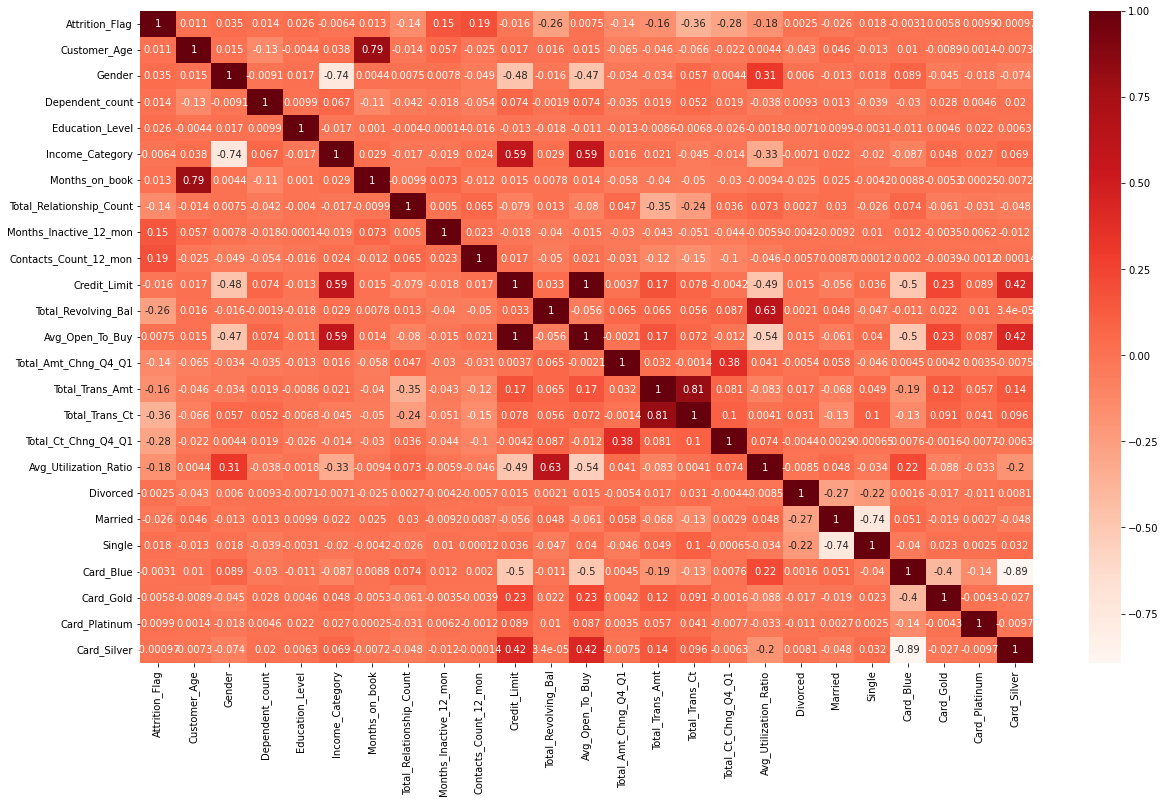

In [6]:
fig = plt.figure(figsize=(20, 12))
sns.heatmap(data.corr(), annot=True, cmap='Reds')

### 1) Prepare y (for the target) and X (for the predictors)

In [7]:
X = data[['Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']]
X.head()

,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
0,1,3,777,42,1.625
1,1,2,864,33,3.714
2,1,0,0,20,2.333
3,4,1,2517,20,2.333
4,1,0,0,28,2.500


In [8]:
y = data['Attrition_Flag'].values

### 2) Plot the density function of _Customer_Age_ with one color for the customers who have left (Attrition_Flag = 1) and one other color for the customers who are still in the bank (Attrition_Flag = 0). Plot the same for _Total_Trans_Ct_ and _Total_Revolving_Bal_ 
### (3 plots expected)

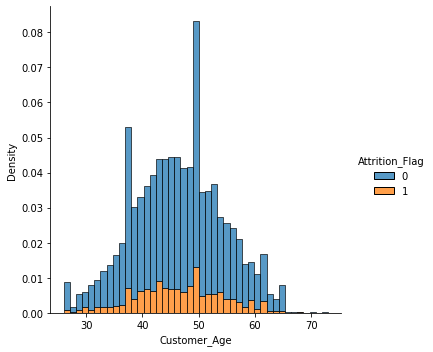

In [9]:
sns.displot(data=data, x='Customer_Age', hue='Attrition_Flag', stat='density', multiple="stack")

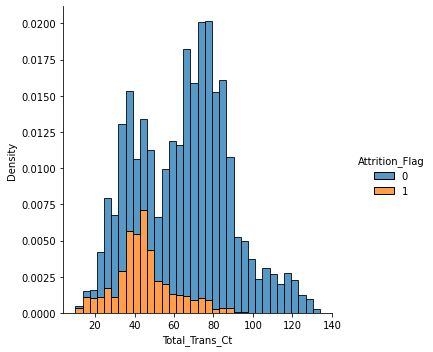

In [10]:
sns.displot(data=data, x='Total_Trans_Ct', hue='Attrition_Flag', stat='density', multiple="stack")

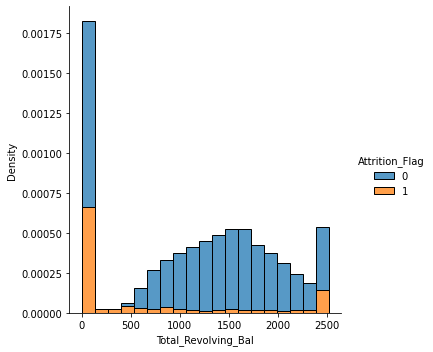

In [11]:
sns.displot(data=data, x='Total_Revolving_Bal', hue='Attrition_Flag', stat='density', multiple="stack")

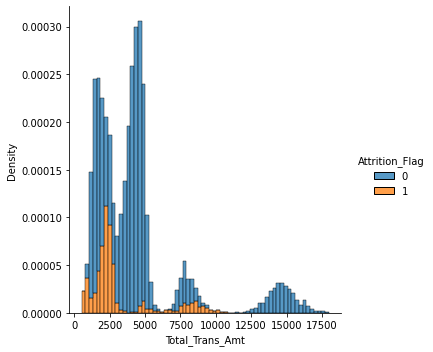

In [12]:
sns.displot(data=data, x='Total_Trans_Amt', hue='Attrition_Flag', stat='density', multiple="stack")

### 3) Plot with stacked bars the repartition of _Gender_ among customers who have left (Attrition_Flag = 1) and customers who are still in the bank (Attrition_Flag = 0). Plot the same for _Education_Level_ 
### (2 plots expected)

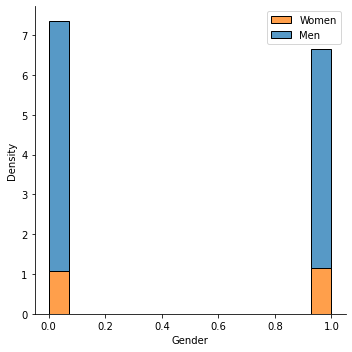

In [13]:
sns.displot(data=data, x='Gender', hue='Attrition_Flag', stat='density', legend=False, multiple="stack")
plt.legend(['Women', 'Men'])

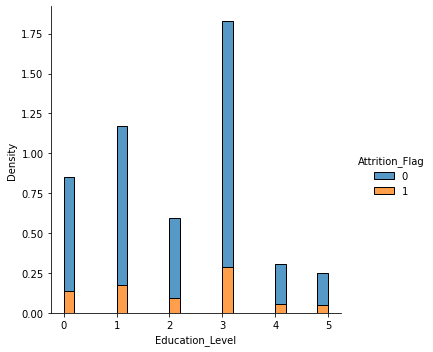

In [14]:
sns.displot(data=data, x='Education_Level', hue='Attrition_Flag', stat='density', multiple="stack")

<AxesSubplot:xlabel='Total_Trans_Amt'>

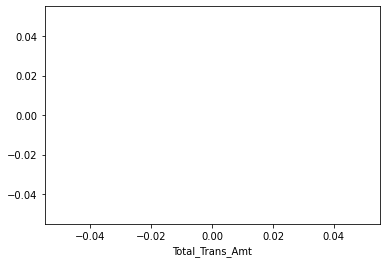

In [16]:
# 

### 4) When you look at the figures of questions 2 and 3, which predictor(s) among  _Customer_Age_ , _Total_Trans_Ct_ , _Total_Revolving_Bal_ , _Gender_ , and _Education_Level_ do you think is(are) the best for predicting the churn? Explain why.

Customer age is a good one together with Total_Trans_Ct because Attr_Flag is distrubuted in a linear way throughout the data.

### 5) Proceed to a split of the data set. Bear in mind that you will be asked for an accurate estimation of the performance of your best model at the end. Keep 60 % of the examples for the test set.

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.60, random_state = 0)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def measure_perf(y_true, y_pred):
    print("Mean square error (MSE): %.2f" % mean_squared_error(y_true, y_pred))
    print("Root mean square error (RMSE): %.2f" % mean_squared_error(y_true, y_pred, squared=False))
    print("Mean absolute error (MAE): %.2f" % mean_absolute_error(y_true, y_pred))
    print("R^2 score is: %.2f" % r2_score(y_true, y_pred))

### 6) Choose ONE metric that you will use to evaluate models that will predict churn. Write it down and explain why you choose this metric. 

I would go with Total_Trans_Ct because of the highest negative correlation percentage

### 7) Train a model of your choice (except Random Forest), using ALL features

In [ ]:
from sklearn.model_selection import train_test_split


X_t = data['Total_Trans_Ct'].values.reshape(-1,1)

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_t, y, test_size = 0.60, random_state = 0)
print ('Train set:\t', X_train_t.shape,  y_train_t.shape)
print ('Test set:\t', X_test_t.shape,  y_test_t.shape)

Train set:	 (3056, 1) (3056,)
Test set:	 (4585, 1) (4585,)


### 8) Train a Random Forest, using all features, and tune the following hyperparameters: [ number of estimators, max_depth ]  
Notes: 
- "Tune" means find the optimal value for that hyperparameter
- If you are not sure how tune more than one parameter at once, just tune the number of estimators


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = {'classifier': RandomForestClassifier(n_estimators = 100, random_state = 0, max_depth=4)}
rf['classifier'].fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {'n_estimators': [400, 500], 'max_depth': [7, 8]} # cutted down due to long processing time
rf_cv = GridSearchCV(estimator=rf['classifier'], param_grid=param_grid, cv=5)
rf_cv.fit(X_train, y_train)
print(rf_cv.best_params_)

{'max_depth': 7, 'n_estimators': 500}


In [ ]:
rf2 = {'classifier': RandomForestClassifier(n_estimators = 500, random_state = 0, max_depth=8)}
rf2['classifier'].fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=500, random_state=0)

### 9) Compare the performance of the models you have trained. Comment the results based on the metric you chose earlier.

## ALL FEATURES USED DUE TO THE EXPLANATION AT POINT 8

In [ ]:
y_pred = rf['classifier'].predict(X_test)
measure_perf(y_test, y_pred)

Mean square error (MSE): 0.10
Root mean square error (RMSE): 0.32
Mean absolute error (MAE): 0.10
R^2 score is: 0.25


In [ ]:
y_pred2 = rf2['classifier'].predict(X_test)
measure_perf(y_test, y_pred2)

Mean square error (MSE): 0.09
Root mean square error (RMSE): 0.30
Mean absolute error (MAE): 0.09
R^2 score is: 0.30


2nd is better thanks to GridCV

### 10) Plot the ROC curves for your models. Does it confirm your choice?

In [ ]:
from deepchecks.tabular.checks import RocReport
from deepchecks.tabular import Dataset

RocReport().run(Dataset(data=data, label='Attrition_Flag'), rf['classifier'])

TypeError: __init__() got an unexpected keyword argument 'data'

In [ ]:
RocReport().run(Dataset(data, label='Attrition_Flag'), rf2['classifier'])

It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data.
14 categorical features were inferred: Gender, Dependent_count, Education_Level, Income_Category, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon... For full list use dataset.cat_features
/Users/zx/miniconda3/envs/FSAML/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Avg_Open_To_Buy
- Avg_Utilization_Ratio
- Card_Blue
- Card_Gold
- Card_Platinum
- ...
Feature names must be in the same order as they were in fit.




ModelValidationError: Got error when trying to predict with model on dataset: X has 24 features, but RandomForestClassifier is expecting 5 features as input.

## PART 2: Making clusters of customers (3 points)

In this part, we will not consider the churn, we will on focus on the information in X to create three clusters of customers. Customers among each cluster should share similarities so that specific EPIBank employees can focus their attention on each cluster.

### 11) Train a k-Means clustering (on ALL features) with k = 3

In [ ]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [ ]:
y_pred_km = kmeans.predict(X)

### 12) Plot (scatter) Credit_Limit vs. Income_Category with colors corresponding to the cluster attribution

<AxesSubplot:xlabel='Credit_Limit', ylabel='Income_Category'>

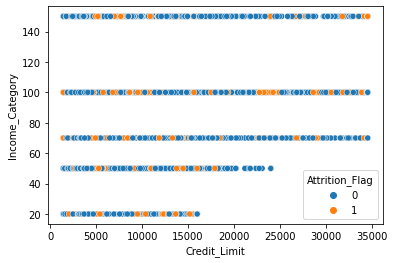

In [ ]:
sns.scatterplot(data=data, x='Credit_Limit', y='Income_Category', hue='Attrition_Flag')

### 13) Compute the mean values for the following features among the whole group of customers: [Customer_Age, Credit_Limit, Gender, Income_Category, Education_Level, Card_Silver]

In [ ]:
print(data['Customer_Age'].mean())
print(data['Credit_Limit'].mean())
print(data['Gender'].mean())
print(data['Income_Category'].mean())
print(data['Education_Level'].mean())
print(data['Card_Silver'].mean())

46.30375605287266
8559.183209004055
0.47454521659468657
57.87724119879597
2.063473367360293
0.056667975395890594


### 14) Compute the mean values for the same features as in question 13 among each individual cluster. 

Median?

In [ ]:
print(data['Customer_Age'].median())
print(data['Credit_Limit'].median())
print(data['Gender'].median())
print(data['Income_Category'].median())
print(data['Education_Level'].median())
print(data['Card_Silver'].median())

46.0
4343.0
0.0
50.0
2.0
0.0


### 15) Based on your results on the two previous questions, describe the three clusters in terms of the characteristics of its members. 